# FEATURES DESCRIPTION
#### Source Data:
- The dataset used is data from https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset
- The raw data contains 7043 rows (customers) and 21 columns (features).

#### Data Dictionary :
- customerID - Customer's ID.
- gender - Customer's gender.
- SeniorCitizen - Whether the customer is a senior citizen or not.
- Partner - Whether the customer has a partner or not.
- Dependents - Whether the customer has dependents or not.
- tenure - How long has the customer subscribed in months.
- PhoneService - Whether the customer has a phone service or not.
- MultipleLines - Whether the customer has multiple lines or not.
- InternetService - Customer’s internet service provider status.
- OnlineSecurity - Whether the customer has online security or not.
- OnlineBackup - Whether the customer has online backup or not.
- DeviceProtection - Whether the customer has device protection or not.
- TechSupport - Whether the customer has tech support or not.
- StreamingTV - Whether the customer has streaming TV or not.
- StreamingMovies - Whether the customer has streaming movies or not.
- Contract - The customer's contract term.
- PaperlessBilling - Whether the customer has paperless billing or not.
- PaymentMethod - The customer’s payment method.
- MonthlyCharges - The amount charged to the customer (monthly).
- TotalCharges - The total amount charged to the customer.
- Churn - Whether the customer churned or not churned.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# OVERVIEW
> In this section we will import the required libraries, load data and also check important information for later analysis such as: data types, missing values, etc.

In [77]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, log_loss


import warnings
warnings.filterwarnings('ignore')


## LOAD DATA

In [3]:
df = pd.read_csv('drive/MyDrive/data/Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> Based on the info and also the dataframe above, it can be seen that the gender, tenure and customerID features have different typing from other features. Therefore we will change the names of these features so that their typing is uniform with other features.

In [6]:
df = df.rename(columns = {
        'tenure' : 'Tenure',
        'gender' : 'Gender',
        'customerID' : 'CustomerID'
      })

In [7]:
data = pd.DataFrame({'Columns' : df.columns, 'dataType' : df.dtypes.values, 
                  'null' : [df[i].isna().sum() for i in df.columns],
                  'null percentage' : [((df[i].isna().sum()/len(df[i]))*100).round(1) for i in df.columns],
                  'Nunique' : [df[i].nunique() for i in df.columns],
                  'uniqueSample' : [list(pd.Series(df[i].unique()).sample(2)) for i in df.columns]}).reset_index(drop = True)

data.sort_values(by = "Columns", ascending=True)

,Columns,dataType,null,null percentage,Nunique,uniqueSample
20,Churn,object,0,0.0,2,"[Yes, No]"
15,Contract,object,0,0.0,3,"[Two year, Month-to-month]"
0,CustomerID,object,0,0.0,7043,"[5766-XQXMQ, 1222-KJNZD]"
4,Dependents,object,0,0.0,2,"[No, Yes]"
11,DeviceProtection,object,0,0.0,3,"[Yes, No internet service]"
1,Gender,object,0,0.0,2,"[Female, Male]"
8,InternetService,object,0,0.0,3,"[No, Fiber optic]"
18,MonthlyCharges,float64,0,0.0,1585,"[18.75, 56.2]"
7,MultipleLines,object,0,0.0,3,"[No, No phone service]"
10,OnlineBackup,object,0,0.0,3,"[Yes, No]"


> Based on the information above, it can be seen that the SeniorCitizen and TotalCharges features have an inaccurate data type, although for the SenioCitizen feature we need to change the data type to numeric when working on a machine learning model, but in my opinion it will be easier for our EDA to use the object data type for this feature.

# PREPROCESSING
> In this section we will check the missing values ​​and outliers for each feature and handle them. In addition, we will change the data type of several features to facilitate the EDA process in the future.

In [8]:
# mengubah tipe data feature SeniorCitizen menjadi objek (No dan Yes)
df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace = True)

In [9]:
# mengubah tipe data feature TotalCharges menjadi numerik
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [10]:
# mengecek missing values tiap-tiap feature
df.isna().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

> Based on the information above, it can be seen that the TotalCharges feature has 11 missing values ​​and this is **MCAR (Missing Completely At Random)** so we can delete it.

In [11]:
df = df.dropna()

In [12]:
# fungsi untuk mengecek outlier pada feature
def find_outliers(data):
    Q1 = data.quantile(.25)
    Q3 = data.quantile(.75)
    
    IQR = Q3 - Q1

    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR
    
    low_out = []
    upper_out = []
    
    for i in data:
        if(i < min_IQR):
            low_out.append(i)
        if(i > max_IQR):
            upper_out.append(i)
        
    print(f'Jumlah Outlier = {len(low_out) + len(upper_out)}')
    persen_out = (len(low_out) + len(upper_out))/len(data)*100
    print(f'Presentasi Outlier = {round(persen_out, 2)}%')
    

In [13]:
find_outliers(df['Tenure'])

Jumlah Outlier = 0
Presentasi Outlier = 0.0%


In [14]:
find_outliers(df['MonthlyCharges'])

Jumlah Outlier = 0
Presentasi Outlier = 0.0%


In [15]:
find_outliers(df['TotalCharges'])

Jumlah Outlier = 0
Presentasi Outlier = 0.0%


> Based on the outlier exploration that we have done, it can be seen that there are no outliers for the numerical features in this data, therefore we don't need to handle outliers and use a robust scaler in the future.

#EXPLORATORY DATA ANALYSIS

In [16]:
df_num = df.select_dtypes(include=['int64','float64'])
df_cat = df.select_dtypes(include='object')

In [17]:
df_num.columns

Index(['Tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

## TARGET FEATURE

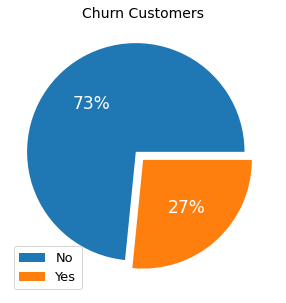

In [18]:
plt.figure(figsize = (5,5))
plt.title('Churn Customers', fontsize = 14)

labels = 'No', 'Yes'

plt.pie(df['Churn'].value_counts(), autopct = '%.0f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower left', fontsize = 13)

plt.show()

In [19]:
df['Churn'].value_counts().reset_index()

,index,Churn
0,No,5163
1,Yes,1869


> From a total of 7043 customers :
- 73.46% No churn
- 26.54% Churn

## NUMERICAL FEATURES

In [20]:
# fungsi untuk memplot distribusi setiap feature numerik di data ini.
def num_plot(df, column):
  
  plt.figure(figsize=(10,5))
  plt.title(f'Distribution Of {column}')
  sns.distplot(df[df['Churn'] == 'No'][column], label='No')
  sns.distplot(df[df['Churn'] == 'Yes'][column], label='Yes')
  plt.legend()
  plt.show()

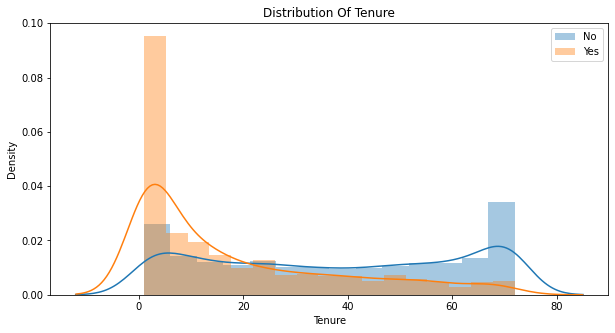

In [21]:
num_plot(df, 'Tenure')

> Based on the distribution plot above, it can be seen that customers who churn usually have a tenure of 1-5 months.

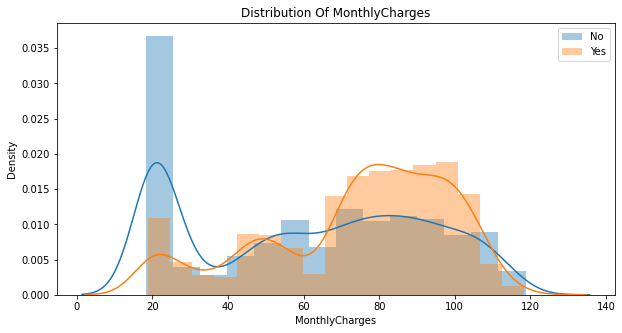

In [22]:
num_plot(df, 'MonthlyCharges')

> Based on the above plot, chrun customers usually have monthly charges between 70-75 dollars. Meanwhile, customers who do not churn have a monthly charge ranging from 19-20 dollars.

## CATEGORICAL FEATURES

In [23]:
def cat_plot(df, column):
    
    plt.figure(figsize=(10,5))
    sns.countplot(x = column, data = df, hue = 'Churn')
    plt.show()
    
    new = pd.crosstab(df[column], df['Churn'])
    new['Churn Percentage']= round(((new['Yes']/new['No'])*100), 2)
    return new.sort_values(by=['Churn Percentage'], ascending=False)

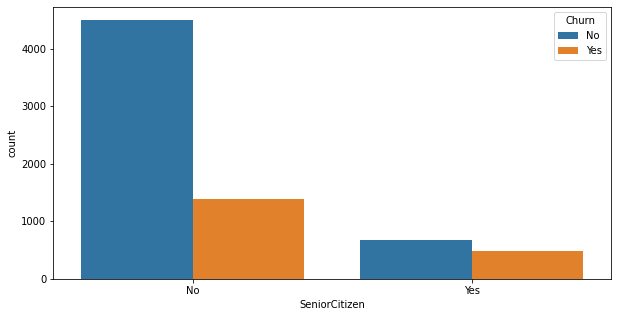

Churn,No,Yes,Churn Percentage
SeniorCitizen,,,
Yes,666,476,71.47
No,4497,1393,30.98


In [24]:
cat_plot(df, 'SeniorCitizen')

> Based on the plot and data above, it can be seen that senior citizen customers have a greater percentage of churn than non-senior customers, namely **71.47% (476 customers).**

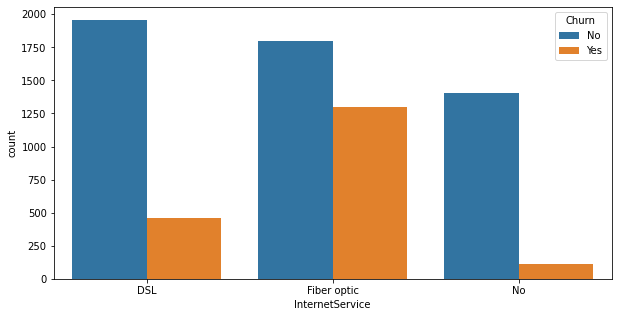

Churn,No,Yes,Churn Percentage
InternetService,,,
Fiber optic,1799,1297,72.10
DSL,1957,459,23.45
No,1407,113,8.03


In [25]:
cat_plot(df, 'InternetService')

> Based on the plot and data above, it can be seen that customers who churn are dominated by customers who have fiber optic internet service as many as **1297 customers (72.10%)**.

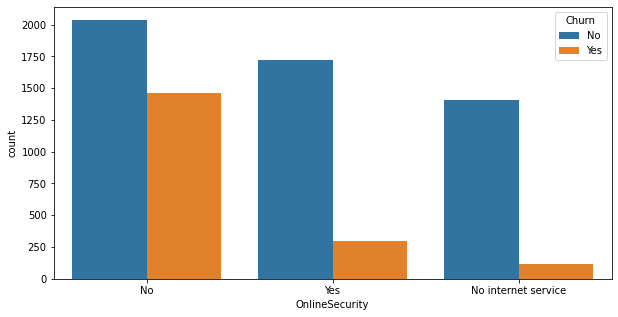

Churn,No,Yes,Churn Percentage
OnlineSecurity,,,
No,2036,1461,71.76
Yes,1720,295,17.15
No internet service,1407,113,8.03


In [26]:
cat_plot(df, 'OnlineSecurity')

> Based on the plot above, it can be seen that customers who do not have online security have a greater percentage of churn than other customers, namely **71.76% (1461) customers**.

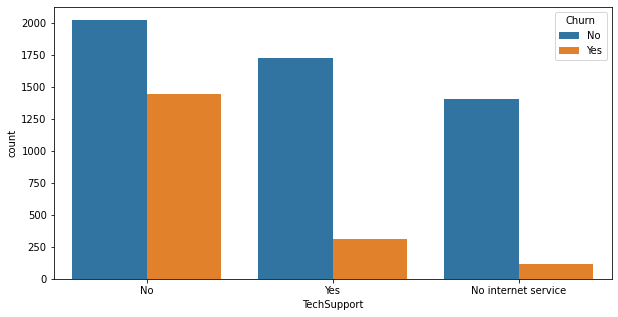

Churn,No,Yes,Churn Percentage
TechSupport,,,
No,2026,1446,71.37
Yes,1730,310,17.92
No internet service,1407,113,8.03


In [27]:
cat_plot(df, 'TechSupport')

> Based on the plot and data above, it can be seen that customers who do not have tech support have a higher churn percentage than other customers in this categorical variable **(71.37%)**.

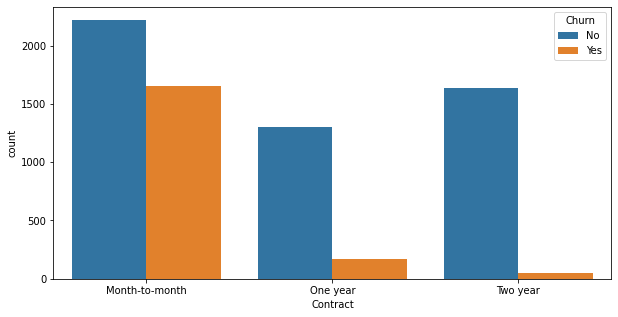

Churn,No,Yes,Churn Percentage
Contract,,,
Month-to-month,2220,1655,74.55
One year,1306,166,12.71
Two year,1637,48,2.93


In [28]:
cat_plot(df, 'Contract')

> Based on the plot and data above, it can be seen that customers who have contract in Month-to-month have a higher churn percentage than other customers in this categorical variable **(74.55%)**.

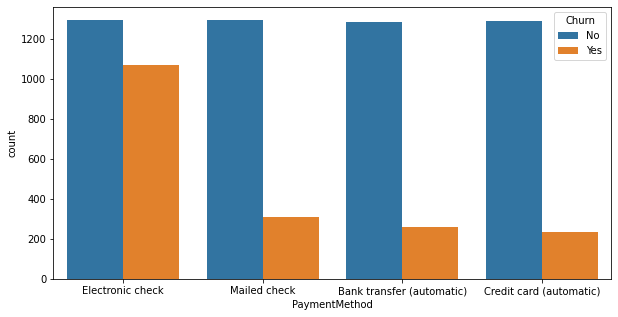

Churn,No,Yes,Churn Percentage
PaymentMethod,,,
Electronic check,1294,1071,82.77
Mailed check,1296,308,23.77
Bank transfer (automatic),1284,258,20.09
Credit card (automatic),1289,232,18.00


In [29]:
cat_plot(df, 'PaymentMethod')

> Based on the plot and data above, it can be seen that customers who have PaymentMethod have a higher churn percentage than other customers in this categorical variable **(82.77%)**.

# FEATURE ENGINEERING
> This section is used to transform raw data into features that can be used to create predictive models using Machine Learning or Statistical Modeling. Feature engineering in Machine Learning aims to improve model performance.

## FEATURE ENCODE

### ONE HOT ENCODING
> Changing the nominal feature value to binary 1 and 0.

In [30]:
df_enc = df.copy()

In [31]:
for i in df_enc[['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']]:
  df_enc = pd.get_dummies(df_enc, prefix=i, columns=[i], drop_first=True)

### TARGET ENCODING
> Changing the target feature value to be numeric.

In [32]:
df_enc['Churn'] = LabelEncoder().fit_transform(df_enc[['Churn']])

In [33]:
df_enc = df_enc.drop(columns='CustomerID')

## FEATURE SCALING
> Scaling numeric feature values ​​so that the model can better predict outcomes.

In [34]:
df_scl = df_enc.copy()

In [35]:
scalar = MinMaxScaler()

for i in df_scl[['Tenure', 'MonthlyCharges', 'TotalCharges']]:
  df_scl[i] = scalar.fit_transform(df_scl[[i]])

## FEATURE SELECTION
> Select important features using feature importance.

In [36]:
df_ft_slc = df_scl.copy()

In [37]:
x = df_ft_slc.drop(columns=['Churn']) #independent feature
y = df_ft_slc['Churn'] #target

[0.1596542  0.13021727 0.15919324 0.03660844 0.02515575 0.0300954
 0.02458038 0.00490758 0.02961986 0.00438823 0.02404171 0.04895554
 0.0038456  0.0056571  0.02863223 0.0039369  0.02759833 0.00680063
 0.02480517 0.00201036 0.02623297 0.0067334  0.02231571 0.0057067
 0.02346199 0.02941905 0.0353367  0.01670547 0.03949907 0.01388503]


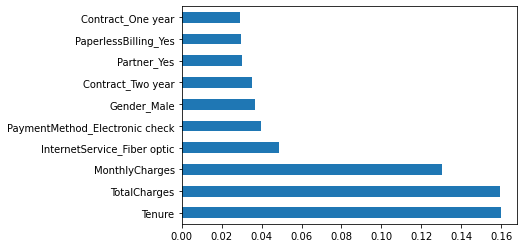

In [38]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [39]:
df_slc = pd.DataFrame()
df_slc = df_ft_slc[feat_importances.nlargest(10).index]

In [40]:
df_slc['Churn'] = df_ft_slc['Churn']

In [41]:
df_slc.head()

,Tenure,TotalCharges,MonthlyCharges,InternetService_Fiber optic,PaymentMethod_Electronic check,Gender_Male,Contract_Two year,Partner_Yes,PaperlessBilling_Yes,Contract_One year,Churn
0,0.000000,0.001275,0.115423,0,1,0,0,1,1,0,0
1,0.464789,0.215867,0.385075,0,0,1,0,0,0,1,0
2,0.014085,0.010310,0.354229,0,0,1,0,0,1,0,1
3,0.619718,0.210241,0.239303,0,0,1,0,0,0,1,0
4,0.014085,0.015330,0.521891,1,1,0,0,0,1,0,1


# MODELLING
The model that we use this time is a logistic regression model.

In [42]:
X = df_slc.drop(columns=['Churn']) #independent feature
y = df_slc['Churn'] #target

In [43]:
# tarin test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred = model.predict(X_test)

In [46]:
result = pd.DataFrame()
result['y_act'] = y_test
result['y_pred'] = y_pred

In [47]:
result = pd.concat([X_test,result], axis=1)

In [48]:
result.head()

,Tenure,TotalCharges,MonthlyCharges,InternetService_Fiber optic,PaymentMethod_Electronic check,Gender_Male,Contract_Two year,Partner_Yes,PaperlessBilling_Yes,Contract_One year,y_act,y_pred
5561,0.000000,0.000213,0.023881,0,1,1,0,0,0,0,0,0
5814,0.211268,0.035939,0.023383,0,0,1,0,0,1,0,0,0
2645,0.000000,0.000115,0.015423,0,0,0,0,0,0,0,0,0
3983,0.000000,0.000629,0.059701,0,1,1,0,0,1,0,1,0
6438,0.000000,0.006416,0.558706,1,1,1,0,0,1,0,1,1


Text(33.0, 0.5, 'Actual')

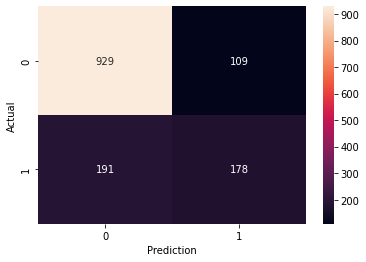

In [49]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1038
           1       0.62      0.48      0.54       369

    accuracy                           0.79      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



> From this model it is better to optimize recall, therefore we take the value of recall churn as an indicator of our model observations.

In [51]:
def cv_score(model, data_x, data_y, scoring, n):
    
    cv = KFold(n_splits=n, shuffle=False)
    scores_train = cross_val_score(model, data_x, data_y, scoring=scoring, cv=cv)
    scores_test = cross_validate(model, data_x, data_y, cv=n)
    
    sns.lineplot(data=scores_train, label='Train', marker='o')
    sns.lineplot(data=scores_test['test_score'], label='Test', marker='o')
    plt.show()

    return pd.DataFrame(data = [round((scores_train.mean()*100), 2), round((scores_test['test_score'].mean()*100), 2)],
                        index = ['Train', 'Test'],
                        columns =['Score (%)'])

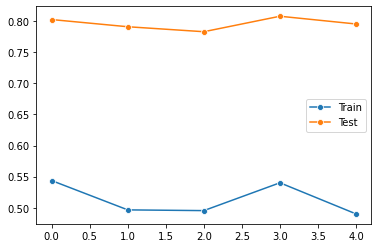

,Score (%)
Train,51.32
Test,79.61


In [52]:
cv_score(model, X_train, y_train, 'recall', 5)

> Based on the mean score of the K-Fold train test for 5 times, it can be concluded that the model is overfit because the difference between the train and test scores is very large.

### HANDLING IMBALANCE

In [53]:
sm = SMOTE(random_state=0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [54]:
model_sm = LogisticRegression()
model_sm.fit(X_train_sm, y_train_sm)

y_pred_sm = model_sm.predict(X_test)

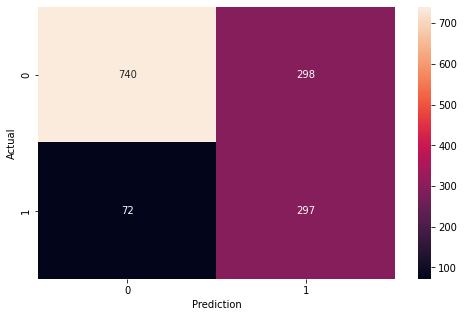

In [55]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_sm), annot=True, fmt='.0f', ax=ax)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [56]:
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1038
           1       0.50      0.80      0.62       369

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



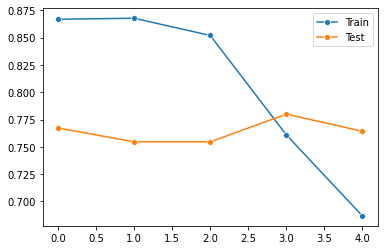

,Score (%)
Train,80.69
Test,76.41


In [57]:
cv_score(model_sm, X_train_sm, y_train_sm, 'recall', 5)

> Based on the mean score of the K-Fold train test for 5 times, it can be concluded that the model is not overfit where the difference between the train and test scores is not too large **(4.2%)**.

### HYPERPARAMETER TUNING LOGISTIC REGRESSION 
> Here we will tune the logistic regression parameter with gridsearch in hopes of getting better recall results.

In [58]:
# parameter logistic regression + nilainya pada tiap parameter dalam bentuk dictionary
param = [{'solver' : ['saga'],
          'penalty' : ['elasticnet', 'l1', 'l2', 'none'],
          'max_iter' : [10,100], 
          'C' : [0.01, 0.1, 1], 
          'l1_ratio' : [0,1]},
         
          {'solver' : ['newton-cg', 'lbfgs'],
           'penalty' : ['l2','none'],
           'max_iter' : [10,100],
           'C' : [0.01, 0.1, 1],
           'l1_ratio' : [0,1]}]


In [59]:
model_gs = GridSearchCV(estimator= model, param_grid=param, cv=5, scoring='recall')

In [60]:
model_gs.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.01, 0.1, 1], 'l1_ratio': [0, 1],
                          'max_iter': [10, 100],
                          'penalty': ['elasticnet', 'l1', 'l2', 'none'],
                          'solver': ['saga']},
                         {'C': [0.01, 0.1, 1], 'l1_ratio': [0, 1],
                          'max_iter': [10, 100], 'penalty': ['l2', 'none'],
                          'solver': ['newton-cg', 'lbfgs']}],
             scoring='recall')

In [61]:
model_gs.best_params_

{'C': 0.01, 'l1_ratio': 0, 'max_iter': 10, 'penalty': 'none', 'solver': 'saga'}

In [62]:
model_lg_tuned = LogisticRegression(C=1, l1_ratio=1, max_iter=10, penalty='none', solver='saga') 

In [63]:
model_lg_tuned.fit(X_train_sm, y_train_sm)

LogisticRegression(C=1, l1_ratio=1, max_iter=10, penalty='none', solver='saga')

In [64]:
y_pred_lg_tuned = model_lg_tuned.predict(X_test)

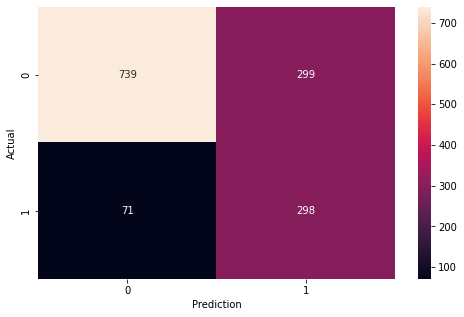

In [65]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_lg_tuned), annot=True, fmt='.0f', ax=ax)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [66]:
print(classification_report(y_test, y_pred_lg_tuned))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1038
           1       0.50      0.81      0.62       369

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



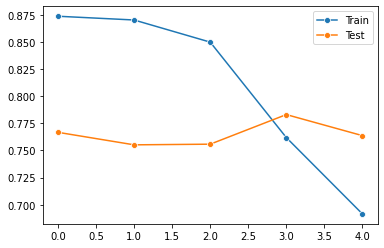

,Score (%)
Train,80.94
Test,76.48


In [67]:
cv_score(model_lg_tuned, X_train_sm, y_train_sm, 'recall', 5)

> Based on the mean score of the K-Fold train test for 5 times, it can be concluded that the model is not overfit where the difference between the train and test scores is not too large **(4.2%)**.

## MODEL EVALUATION

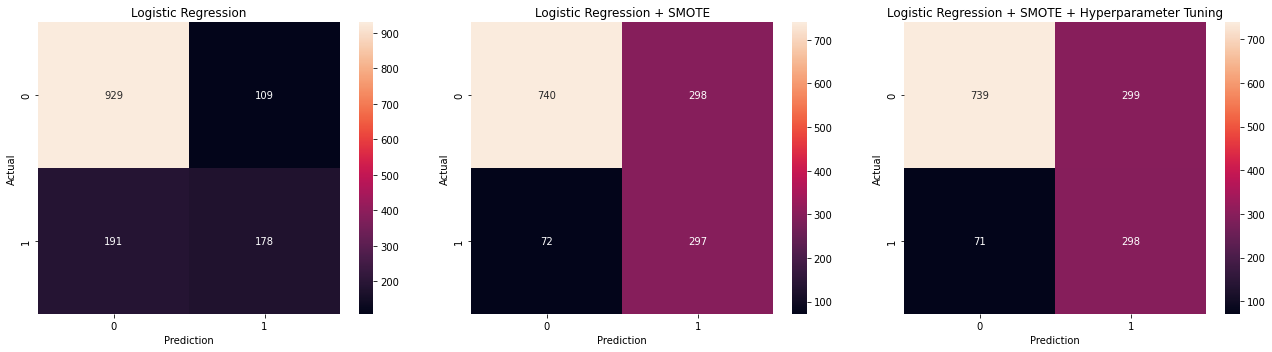

In [68]:
f, ax = plt.subplots(1,3, figsize=(18,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax[0])
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Actual')
ax[0].set_title('Logistic Regression')

sns.heatmap(confusion_matrix(y_test, y_pred_sm), annot=True, fmt='.0f', ax=ax[1])
ax[1].set_xlabel('Prediction')
ax[1].set_ylabel('Actual')
ax[1].set_title('Logistic Regression + SMOTE')

sns.heatmap(confusion_matrix(y_test, y_pred_lg_tuned), annot=True, fmt='.0f', ax=ax[2])
ax[2].set_xlabel('Prediction')
ax[2].set_ylabel('Actual')
ax[2].set_title('Logistic Regression + SMOTE + Hyperparameter Tuning')

plt.tight_layout()
plt.show()

In [69]:
print('Logistic Regression')
print(classification_report(y_test, y_pred))
print('\nLogistic Regression + SMOTE')
print(classification_report(y_test, y_pred_sm))
print('\nLogistic Regression + SMOTE + Hyperparameter Tuning')
print(classification_report(y_test, y_pred_lg_tuned))

Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1038
           1       0.62      0.48      0.54       369

    accuracy                           0.79      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407


Logistic Regression + SMOTE
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1038
           1       0.50      0.80      0.62       369

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407


Logistic Regression + SMOTE + Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1038
           1       0.50      0.81      0.62       369

    accuracy                           0.74      1407
   macro avg       0.71   

> Based on the comparison of the 3 models above, it can be seen that the best recall churn score is in model 3 (Logistic Regression + SMOTE + Hyperparameter Tuning) with a recall value of 81%, followed by model 2 and model 1.

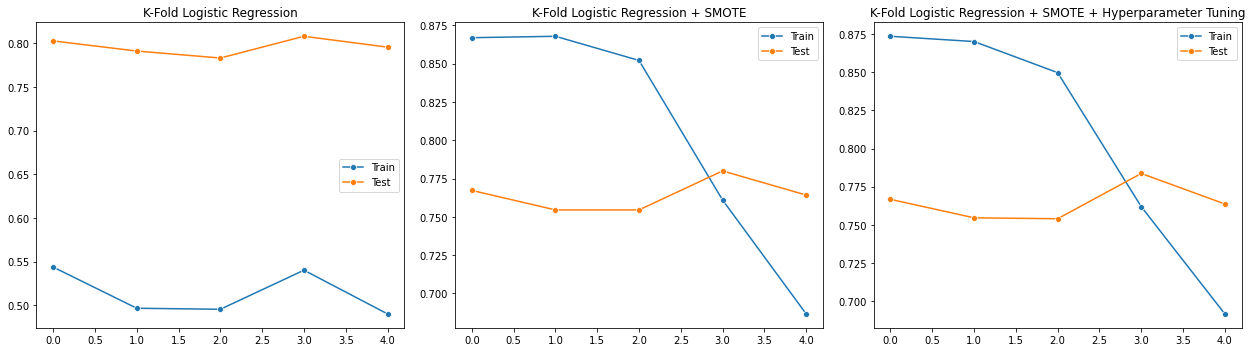

In [70]:
cv = KFold(n_splits=5, shuffle=False)
f, ax = plt.subplots(1,3, figsize=(18,5))

# kfold logistic regression
scores_train1 = cross_val_score(model, X_train, y_train, scoring='recall', cv=cv)
scores_test1 = cross_validate(model, X_train, y_train, cv=5)
sns.lineplot(data=scores_train1, label='Train', marker='o', ax=ax[0])
sns.lineplot(data=scores_test1['test_score'], label='Test', marker='o', ax=ax[0])
ax[0].set_title('K-Fold Logistic Regression')

# kfold logistic regression + smote
scores_train2 = cross_val_score(model_sm, X_train_sm, y_train_sm, scoring='recall', cv=cv)
scores_test2 = cross_validate(model_sm, X_train_sm, y_train_sm, cv=5)
sns.lineplot(data=scores_train2, label='Train', marker='o', ax=ax[1])
sns.lineplot(data=scores_test2['test_score'], label='Test', marker='o', ax=ax[1])
ax[1].set_title('K-Fold Logistic Regression + SMOTE')

# kfold logistic regression + smote + hyperparametertuning
scores_train3 = cross_val_score(model_lg_tuned, X_train_sm, y_train_sm, scoring='recall', cv=cv)
scores_test3 = cross_validate(model_lg_tuned, X_train_sm, y_train_sm, cv=5)
sns.lineplot(data=scores_train3, label='Train', marker='o', ax=ax[2])
sns.lineplot(data=scores_test3['test_score'], label='Test', marker='o', ax=ax[2])
ax[2].set_title('K-Fold Logistic Regression + SMOTE + Hyperparameter Tuning')

plt.tight_layout()
plt.show()

In [71]:
pd.DataFrame({
    '[Logistic Regression]' : [round(scores_train1.mean()*100, 2), round(scores_test1['test_score'].mean()*100, 2)],
    '[Logistic Regression + SMOTE]' : [round(scores_train2.mean()*100, 2), round(scores_test2['test_score'].mean()*100, 2)],
    '[Logistic Regression + SMOTE + Hyperparameter Tuning]' : [round(scores_train3.mean()*100, 2), round(scores_test3['test_score'].mean()*100, 2)],
}, index = ['Train', 'Test'])

,[Logistic Regression],[Logistic Regression + SMOTE],[Logistic Regression + SMOTE + Hyperparameter Tuning]
Train,51.32,80.69,80.94
Test,79.61,76.41,76.45


> In conclusion, based on the K-Fold train test scores and also the classification of each model, it can be concluded that the logistic regression model with SMOTE + Hyperparameter Tuning gives the best results among other models for this case.

# CONCLUSION
> 1. From a total of 7043 customers :
 - 73.46% Not churn
 - 26.54% Churn
2. Customers who churn usually have a **tenure** of 1-5 months.
3. Customers who churn are dominated by customers who have **fiber optic** internet service as many as 1297 customers (72.10%).
4. Customers who **do not have online security** have a greater percentage of churn than other customers, namely 71.76% (1461) customers.
5. Customers who **do not have tech support** have a higher churn percentage than other customers in this categorical variable (71.37%).
6. Customers who have **contract in Month-to-month** have a higher churn percentage than other customers in this categorical variable (74.55%).
7. Customers who have **PaymentMethod** have a higher churn percentage than other customers in this categorical variable (82.77%).
8. Based on the K-Fold train test scores and also the classification of each model, it can be concluded that the logistic regression model with SMOTE + Hyperparameter Tuning gives the best results among other models for this case.
